In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from scipy.stats import variation
import matplotlib.pyplot as plt

In [ ]:
# Load the csv file with all participant details 
#(Includes - participant details, SSI_score details,Speech_rate, and long and short pause metrics)
par_details = pd.read_csv(#'...../Stat_csv_files/AWNS_AWS_all_details.csv') #Change path as required


In [ ]:
df = par_details.copy()
group_col = 'Group'

In [ ]:
xdata = df # Assuming data.csv exists in the specified directory

# Compare means (grouped by condition)
xagg = xdata.groupby("Group").mean(numeric_only=True).reset_index()
#print(xagg)  # Display aggregated data

In [ ]:
pval_file = #'.../Stat_csv_files/pval.csv'#Change path as required
pval_table = pd.read_csv(pval_file)
#pval_table[['Metric','p-value']]

In [ ]:
pval_table[['Metric','p-value']]

,Metric,p-value
0,Speech_Rate,0.002604
1,Pause_Duration_s,0.004071
2,Mean_Speech_s_ms,0.696722
3,CV_Pause,0.936559
4,CV_Speech,0.001999
5,long_p_durations_mean_ms,0.375660
6,short_p_durations_mean_ms,0.026320
7,long_p_durations_cv,0.117761
8,short_p_durations_cv,0.603470
9,log_Mean_Pause_s_ms,0.044413


In [ ]:
def plot_metric_from_pval(column_name, metric_name, y_ax_label, df, group_col, pval_table, plot_figure=1, unit_conversion_factor=1, plot_title_input=None):
    """
    Plot AWS vs. AWNS data using a title from the corresponding row in a p-value table and the p-value from the 'p' column.
    
    Parameters:
    df (DataFrame): The main DataFrame containing participant data.
    column_name (str): The metric column to be compared.
    group_col (str): The column indicating the group ('AWS' or 'AWNS').
    pval_table (DataFrame): Table containing p-values and corresponding metric names.
    metric_name (str): The metric name to be used as the plot title.
    plot_figure (int, optional): 1 to plot the figure, 0 to skip plotting. Default is 1 (plot).
    unit_conversion_factor (float, optional): Factor to convert units. Default is 1 (no conversion).
    plot_title_input (str, optional): Optional title input by the user. If None, the title from the pval_table will be used.
    
    Returns:
    None
    """
    # Extract AWS and AWNS data
    AWS_data_chk = df[df[group_col] == 'AWS'][column_name] * unit_conversion_factor
    AWNS_data_chk = df[df[group_col] == 'AWNS'][column_name] * unit_conversion_factor
    
    # Retrieve the corresponding metric name for the plot title and p-value for 'Group[T.AWS]'
    # Check if the 'Predictor' column exists in pval_table
    if 'Predictor' in pval_table.columns:
        selected_row = pval_table[(pval_table['Metric'] == metric_name) & ((pval_table['Predictor'] == 'Group[T.AWS]') | (pval_table['Predictor'] == 'Group_AWS'))]

    else:
        selected_row = pval_table[pval_table['Metric'] == metric_name]   
    plot_title = plot_title_input if plot_title_input else selected_row['Metric'].values[0] if not selected_row.empty else metric_name
    p_value = selected_row['p-value'].values[0] if not selected_row.empty else 'N/A'
    print(f"p_value: {p_value}")
    if plot_figure == 1:
        data = [AWNS_data_chk, AWS_data_chk]
        fig = plt.figure(figsize=(5, 4))
        ax = fig.add_axes([0, 0, 1, 1])
        bp = ax.boxplot(data, patch_artist=True)
        
        # Set colors for the box plots
        colors = ['yellowgreen', 'cornflowerblue']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        for median in bp['medians']:
            median.set(color='black', linewidth=3)
        
        # Customize the plot
        plt.title(f"{plot_title}", fontsize=20)
        plt.xticks([1, 2], ['AWNS', 'AWS'], fontsize=20)
        plt.yticks(fontsize=15)
        plt.ylabel(y_ax_label, fontsize=20)
        # Significance level and annotation
        bottom, top = ax.get_ylim()
        y_range = top - bottom
        bar_height = (y_range * 0.07 * -1) + top
        #p_value = float(p_value)
        
        if p_value < 0.001:
            sig_symbol = '***'
        elif p_value < 0.01:
            sig_symbol = '**'
        elif p_value < 0.05:
            sig_symbol = '*'
        else:
            sig_symbol = ''
        
        text_height = bar_height - (y_range * 0.1)
        plt.text(1.5, text_height, sig_symbol, ha='center', va='bottom', color='k', fontsize=25)

        plt.show()


p_value: 0.04441336809941552


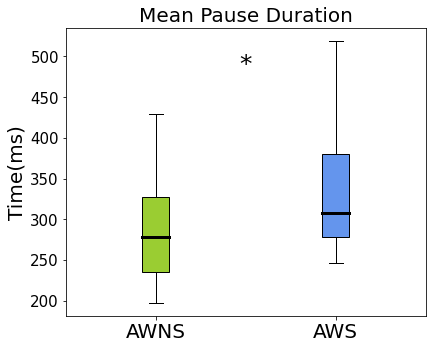

In [ ]:
# Mean Pause Dur
plot_metric_from_pval('Mean Pause_s','log_Mean_Pause_s_ms','Time(ms)', df, group_col, pval_table,  plot_figure=1, unit_conversion_factor=1000,plot_title_input='Mean Pause Duration')

p_value: 0.0026040148357665428


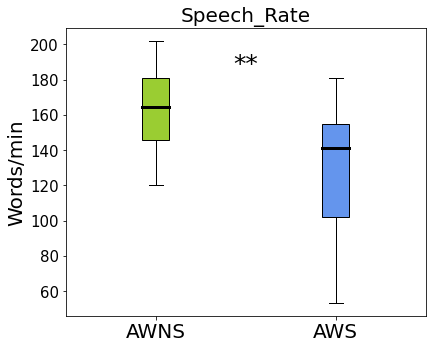

In [ ]:
# Speech Rate
plot_metric_from_pval('Speech_Rate','Speech_Rate','Words/min', df, group_col, pval_table,  plot_figure=1, unit_conversion_factor=1,plot_title_input=None)

p_value: 0.004071195053866847


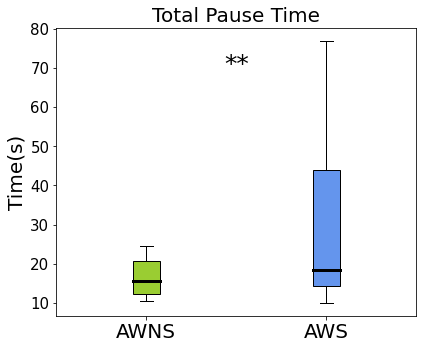

In [ ]:
# Total Pause time
plot_metric_from_pval('Pause_Duration_s','Pause_Duration_s','Time(s)', df, group_col, pval_table,  plot_figure=1, unit_conversion_factor=1,plot_title_input="Total Pause Time")

p_value: 0.001999082943659284


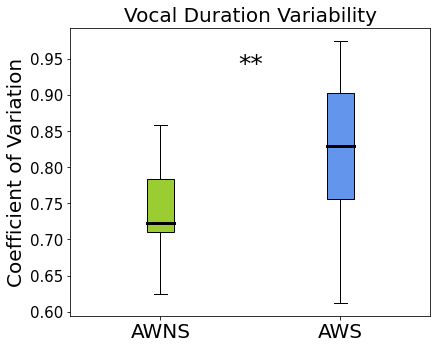

In [ ]:
# Vocal Dur CV
plot_metric_from_pval('CV Speech','CV_Speech','Coefficient of Variation', df, group_col, pval_table,  plot_figure=1, unit_conversion_factor=1, plot_title_input='Vocal Duration Variability')

p_value: 0.012344795291502515


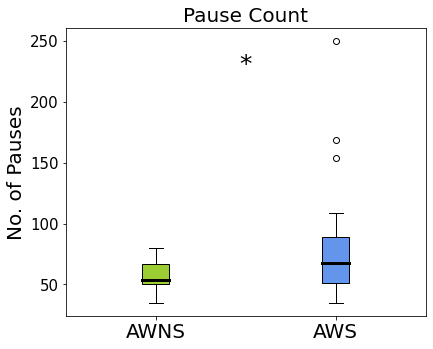

In [ ]:
# Pause Count
plot_metric_from_pval('Pause_Events','Pause_Events','No. of Pauses', df, group_col, pval_table,  plot_figure=1, unit_conversion_factor=1, plot_title_input='Pause Count')

## Long and Short Pause Stats

p_value: 0.0006590995603791456


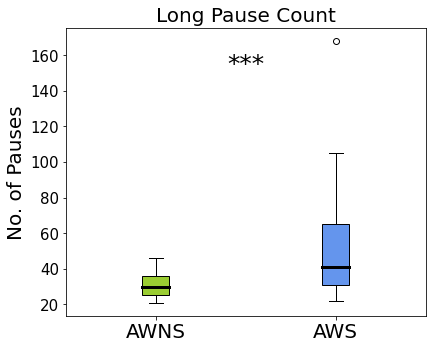

In [ ]:
# Long Pause Count
plot_metric_from_pval('long_p_count','long_p_count','No. of Pauses', df, group_col, pval_table,  plot_figure=1, unit_conversion_factor=1,plot_title_input="Long Pause Count")

p_value: 0.02631960180671377


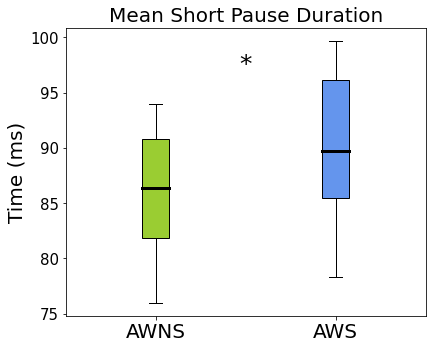

In [ ]:
# Mean Short Pause Dur
plot_metric_from_pval('short_p_durations_mean','short_p_durations_mean_ms','Time (ms)', df, group_col, pval_table,  plot_figure=1, unit_conversion_factor=1000,plot_title_input="Mean Short Pause Duration")

In [ ]:
## Correlations with % SS

In [ ]:
#%SS
aws_stuttered_percent = par_details[par_details['Group'] == 'AWS']['Percent_syllables_stuttered']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

def analyze_and_plot_correlation(x, y, x_label="X-axis", y_label="Y-axis", lp1=0.05, lp2=0.95):

    # Calculate the Pearson correlation coefficient
    corr_coeff, p_value = pearsonr(x, y)
    print("Correlation coefficient:", corr_coeff)
    print("p-value:", p_value)
    
    # Fit a linear regression model
    x1 = np.array(x).reshape(-1, 1)  # Reshape for scikit-learn compatibility
    model = LinearRegression().fit(x1, y)

    # Create a scatter plot of the data
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, alpha=0.7)

    # Add a regression line
    plt.plot(np.unique(x), model.predict(np.unique(x).reshape(-1, 1)), color='black')

    # Add axis labels
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Add correlation coefficient and p-value inside the plot

    plt.text(lp1, lp2, f"r: {corr_coeff:.2f}, p: {'< .001' if p_value < 0.001 else f'{p_value:.2f}'.lstrip('0')}", 
             fontsize=15, ha='left', va='top', fontweight='bold', style='italic', transform=plt.gca().transAxes)


    plt.show()

    return {
        "correlation_coefficient": corr_coeff,
        "p_value": p_value,
        "regression_model": model
    }


Correlation coefficient: 0.757766619579129
p-value: 0.0004253040668956684


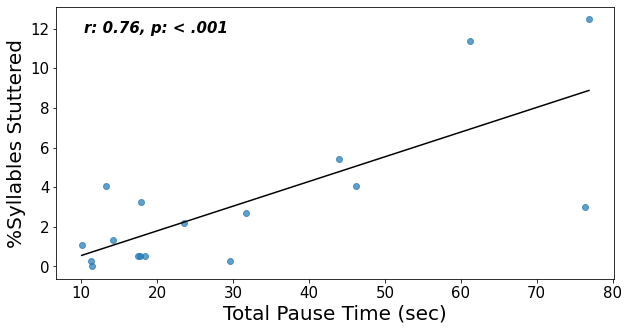

In [ ]:
total_pause_aws = par_details[par_details['Group'] == 'AWS']['Pause_Duration_s']
result1 = analyze_and_plot_correlation(total_pause_aws, aws_stuttered_percent, 
                                      x_label="Total Pause Time (sec)", 
                                      y_label="%Syllables Stuttered")


Correlation coefficient: -0.6285296487849348
p-value: 0.00688545810160661


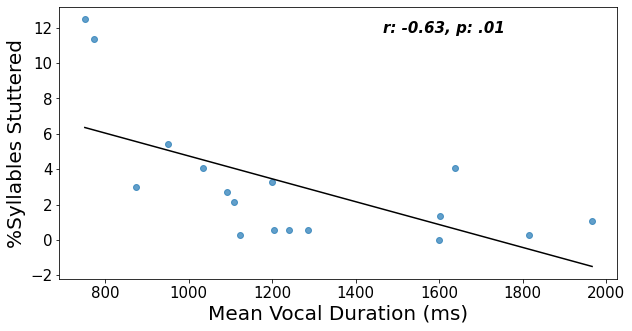

In [ ]:
mean_vocal_duration_aws = par_details[par_details['Group'] == 'AWS']['Mean Speech_s']
result2 = analyze_and_plot_correlation(mean_vocal_duration_aws*1000, aws_stuttered_percent, 
                                      x_label="Mean Vocal Duration (ms)", 
                                      y_label="%Syllables Stuttered",lp1 = 0.58,lp2 = 0.95)


Correlation coefficient: -0.7883848493975696
p-value: 0.00017001974277616505


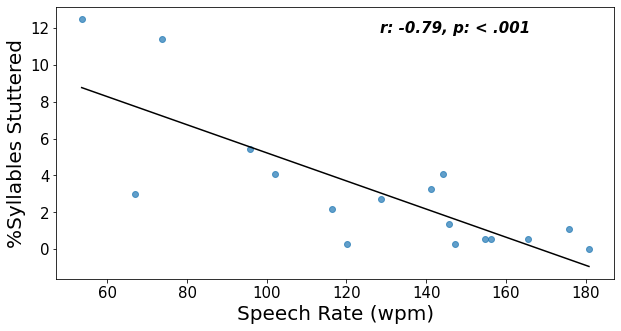

In [ ]:
speech_rate_aws = par_details[par_details['Group'] == 'AWS']['Speech_Rate']
result3 = analyze_and_plot_correlation(speech_rate_aws, aws_stuttered_percent, 
                                      x_label="Speech Rate (wpm)", 
                                      y_label="%Syllables Stuttered", lp1 = 0.58,lp2 = 0.95)


Correlation coefficient: 0.8600600274360253
p-value: 9.539714842337574e-06


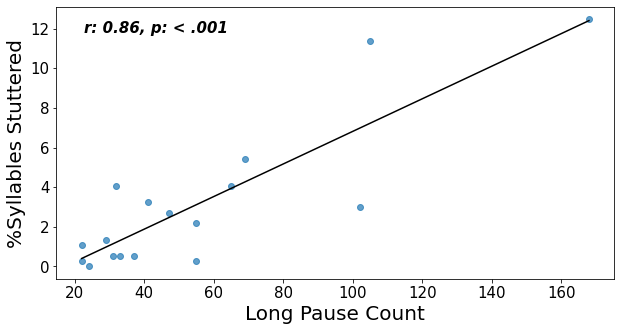

In [ ]:
long_p_count_aws = par_details[par_details['Group'] == 'AWS']['long_p_count']
result4 = analyze_and_plot_correlation(long_p_count_aws, aws_stuttered_percent, 
                                      x_label="Long Pause Count", 
                                      y_label="%Syllables Stuttered")


Correlation coefficient: 0.8791497803795292
p-value: 3.3645316322052193e-06


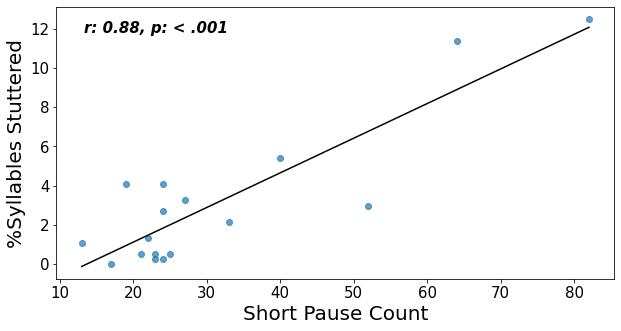

In [ ]:
short_p_count_aws = par_details[par_details['Group'] == 'AWS']['short_p_count']
result5 = analyze_and_plot_correlation(short_p_count_aws, aws_stuttered_percent, 
                                      x_label="Short Pause Count", 
                                      y_label="%Syllables Stuttered")


## Combined Plot

In [ ]:
long_p_count_awns = par_details[par_details['Group'] == 'AWNS']['long_p_count']
short_p_count_awns = par_details[par_details['Group'] == 'AWNS']['short_p_count']

In [ ]:
long_p_count_aws = np.array(long_p_count_aws)
short_p_count_aws = np.array(short_p_count_aws)
long_p_count_awns = np.array(long_p_count_awns)
short_p_count_awns = np.array(short_p_count_awns)

In [ ]:
y_names = aws_stuttered_percent

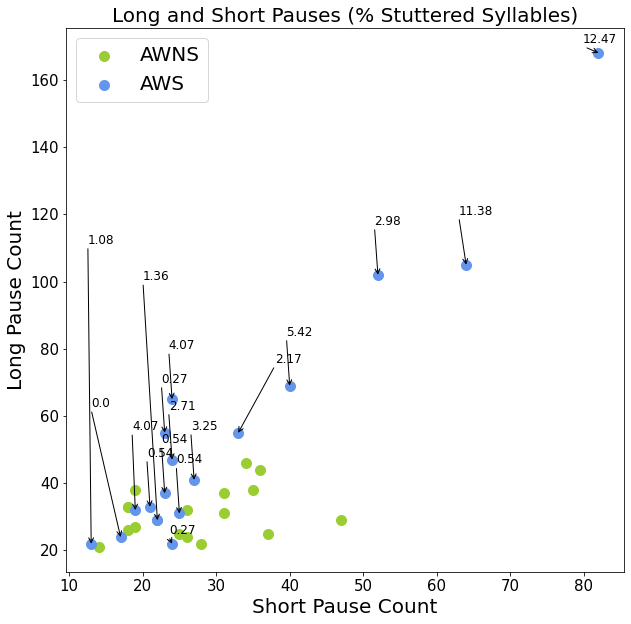

In [ ]:
import matplotlib.pyplot as plt
x_p = [19,24, 21, 13, 25, 33, 40, 24, 82, 64, 17, 27, 52, 22, 23, 24, 23]
y_p = [ 32, 47,33,22,31,55,69, 65,168,105,24, 41,102,29,55,22,37]

xy_1 = [10, 10, 10, 10, 10, 50, 10, 10, 1, 10, -20, 10, 10, -1, 10, 10, 10]
xy_2 = [80, 50, 50, 300, 50, 70, 50, 50, 10, 50, 130, 50, 50, 240, 50, 10, 50]


plt.figure(figsize=(10,10))
plt.scatter(short_p_count_awns,long_p_count_awns,color='yellowgreen', s=100,label='AWNS')

plt.scatter(short_p_count_aws,long_p_count_aws,color= 'cornflowerblue', s=100,label='AWS')
y_names = aws_stuttered_percent

y_names= round(y_names,2)
plt.legend(fontsize=20)

    
for i, txt in enumerate(y_names):
    # Initialize the annotation position to the data point coordinates
    x_pos, y_pos = short_p_count_aws[i], long_p_count_aws[i]
    
#     # Check for overlapping annotations
    for j in range(i):
        if abs(short_p_count_aws[i] - short_p_count_aws[j]) < 0.1 and abs(long_p_count_aws[i] - long_p_count_aws[j]) < 0.1:
            # If the annotation overlaps with another annotation, adjust the position
            x_pos += 0.5
            y_pos += 0.5
    
    # Add the annotation to the plot with an arrow pointing to the data point
    plt.annotate(txt, (x_p[i], y_p[i]),
                xytext=(xy_1[i],xy_2[i]),
                fontsize=12,textcoords='offset points',
                ha='center',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=1,  shrinkA=0, shrinkB=0, relpos=(0,0)))

plt.title('Long and Short Pauses (% Stuttered Syllables)',fontsize=20)
plt.xlabel('Short Pause Count',fontsize=20)
plt.ylabel('Long Pause Count',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()
